In [1]:
## imports 
import qiskit 
from qiskit import *
from qiskit import execute
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
import numpy as np
pi = np.pi

In [2]:
#ansatz
def ansatz(circuit,parameter):
    circuit.ry(parameter,0)
    circuit.cx(0,1)
    circuit.h(0)
    circuit.h(1)
    return circuit

In [3]:
#circuit for ZZ using state vector simulator
def circuit(q,c,parameter):
    circuit = QuantumCircuit(q, c)
    ansatz(circuit,parameter)
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    outputstate = result.get_statevector(circuit)
    expect_val=0
    sign=+1
    for index, key in enumerate(outputstate):
      # For 00 sign is +1 because eigen value of zero is 1 
        if index==0:
            sign=+1
     # For 01 sign is -1 because eigen value of zero is 1 and one is -1 
        if index==1:
            sign=-1
    # For 10 sign is -1 because eigen value of zero is 1 and one is -1 
        if index==2:
            sign=-1
    # For 11 sign is -1 because eigen value of one  is -1 and one is -1
        if index==3:
            sign=+1
        
        expect_val+=sign * key **2
   
    return np.round(expect_val,2)
        

In [5]:
energy_estimates = []

read_list = []

q,c = 2,2
# changing parameters
parameters1 = np.linspace(0, 2*pi, 50)   #theta 

for parameter1 in parameters1:
            parameter =  parameter1
            read =  circuit(q,c,parameter)
            energy_estimate =  read
            read_list.append(read)
            energy_estimates.append(energy_estimate)
print("lowest eigenvalue is: ", min(energy_estimates))


lowest eigenvalue is:  (-1+0j)


C:\Users\Ais-Admin\.conda\envs\QSilver\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


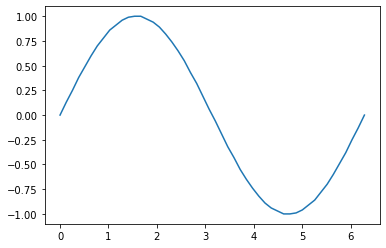

In [8]:
import matplotlib.pyplot as plt
plt.plot(parameters1, energy_estimates, label="Energy Estimation")
